### 1. Import the Libraries

In [27]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


### 2. Load Raw Feedback Data

In this step, I load each feedback dataset into separate pandas DataFrames. The code reads Excel file from the directory. For each file, the session ID is extracted from the filename and added to the DataFrame a new column named `session_id`.

**Important Note:** Feedback data for **Session 7 and Session 8 are missing** since Google Forms were not created for those sessions.

All DataFrames are stored in a list named `all_feedback_dfs` for the next steps.


In [28]:
# The directory where the feedback files are located.
raw_data_dir = r'C:\Users\avaza\Desktop\BHOS Cinema Club Data Analysis Project\data\raw\raw_feedback'

# Sessions 7 and 8 are missing.
feedback_files = [file for file in os.listdir(raw_data_dir) if file.endswith('xlsx')]

feedback_files

['session-01_feedback_black-mirror-bandersnatch_20231020.xlsx',
 'session-02_feedback_encanto_20231106.xlsx',
 'session-03_feedback_the-truman-show_20231123.xlsx',
 'session-04_feedback_the-thing_20231208.xlsx',
 'session-05_feedback_klaus_20231229.xlsx',
 'session-06_feedback_upgrade_20240216.xlsx',
 'session-09_feedback_soul_20241011.xlsx',
 'session-10_feedback_edward-scissorhands_20241227.xlsx',
 'session-11_feedback_1917_20250131.xlsx',
 "session-12_feedback_howl's-moving-castle_20250314.xlsx",
 'session-13_feedback_12-angry-men_20250520.xlsx']

In [29]:
# A list to store the DataFrames
all_feedback_dfs = []

for file_name in feedback_files:
    file_path = os.path.join(raw_data_dir, file_name)

    # Read the Excel file
    df = pd.read_excel(file_path)

    # Extract Session ID from the filename
    match = re.search(r'session-(\d+)_feedback', file_name, re.IGNORECASE)
    session_id = int(match.group(1))
    print(f"Session ID: {session_id}")
    
    # Add a 'session_id' column to the DataFrame
    df['session_id'] = session_id

    # Add the DataFrame to the list
    all_feedback_dfs.append(df)
    print(f"Successfully loaded {file_name}. Rows: {len(df)}")

Session ID: 1
Successfully loaded session-01_feedback_black-mirror-bandersnatch_20231020.xlsx. Rows: 34
Session ID: 2
Successfully loaded session-02_feedback_encanto_20231106.xlsx. Rows: 18
Session ID: 3
Successfully loaded session-03_feedback_the-truman-show_20231123.xlsx. Rows: 31
Session ID: 4
Successfully loaded session-04_feedback_the-thing_20231208.xlsx. Rows: 15
Session ID: 5
Successfully loaded session-05_feedback_klaus_20231229.xlsx. Rows: 7
Session ID: 6
Successfully loaded session-06_feedback_upgrade_20240216.xlsx. Rows: 21
Session ID: 9
Successfully loaded session-09_feedback_soul_20241011.xlsx. Rows: 25
Session ID: 10
Successfully loaded session-10_feedback_edward-scissorhands_20241227.xlsx. Rows: 20
Session ID: 11
Successfully loaded session-11_feedback_1917_20250131.xlsx. Rows: 19
Session ID: 12
Successfully loaded session-12_feedback_howl's-moving-castle_20250314.xlsx. Rows: 14
Session ID: 13
Successfully loaded session-13_feedback_12-angry-men_20250520.xlsx. Rows: 11


In [30]:
print(f"Number of files loaded: {len(all_feedback_dfs)}")

display(all_feedback_dfs[0].head())
display(all_feedback_dfs[10].head())
# The column names are inconsistent. Some are in Azerbaijani, while the rest are in English.

Number of files loaded: 11


,Timestamp,Sessiyadan nə dərəcədə məmnun qaldınız?,Sessiyada bəyəndiyiniz məqamlar:,Növbəti sessiyalarda inkişaf etdirilə bilinəcək məqamlar:,session_id
0,2023-10-20 21:18:11.605,5,Hərşey əla idi,Yer sayı,1
1,2023-10-20 21:18:17.436,5,Evez,Her sey bomba idi,1
2,2023-10-20 21:18:19.383,5,Muhitin Mohtesemliyi,Mence secimli olmayan filmler olsun,1
3,2023-10-20 21:18:32.931,5,Film seçimi,Daha böyük yer seçilə bilər,1
4,2023-10-20 21:18:50.588,4,"Səmimi ortam, seçilən film janrı :)",Film tam izlədilsiiiinn 😂,1


,Timestamp,How are you satisfied about the session?,The things you liked during the session:,Any rooms for improvement in the sessions:,session_id
0,2025-05-20 20:37:37.545,5,the film,i didnt notice,13
1,2025-05-20 20:37:44.571,5,Everything,Everything was perfecttt💃💃💃,13
2,2025-05-20 20:38:57.122,5,You were able to create an appropriate ambiance.,NaN,13
3,2025-05-20 20:40:26.058,5,Qəşəy film və su,.,13
4,2025-05-20 20:41:52.266,5,Voice of the movie and silence in the room,More ottoman pls,13


### 3. Standardize Column Names

This step ensures consistent column names in all feedback DataFrames since the column names are inconsistent. Some are in Azerbaijani, while the rest are in English.

I will use a **mapping** from the inconsistent column names to consistent names: `feedback_date`, `satisfaction_rating`, `liked_aspects_text`, and `areas_for_improvement_text`.

In [31]:
# A mapping dictionary
column_name_mapping = {
    'Timestamp': 'feedback_date',

    'Sessiyadan nə dərəcədə məmnun qaldınız?': 'satisfaction_rating',
    'How are you satisfied about the session?': 'satisfaction_rating',

    'Sessiyada bəyəndiyiniz məqamlar:': 'liked_aspects_text',
    'The things you liked during the session:': 'liked_aspects_text',
    
    'Sessiyalarda inkişaf etdirilməsi mümkün olan məqamlar:': 'areas_for_improvement_text',
    'Növbəti sessiyalarda inkişaf etdirilə bilinəcək məqamlar:': 'areas_for_improvement_text',
    'Any rooms for improvement in the sessions:': 'areas_for_improvement_text',
}

In [32]:
# A list to store DataFremes with standardized column names
standardized_dfs = []

for df in all_feedback_dfs:

    # Rename using mapping
    df = df.rename(columns = column_name_mapping)

    standardized_dfs.append(df)

renamed_columns = df.columns.tolist()

print(f"Renamed Column Names: {renamed_columns}")

all_feedback_dfs = standardized_dfs

Renamed Column Names: ['feedback_date', 'satisfaction_rating', 'liked_aspects_text', 'areas_for_improvement_text', 'session_id']


In [33]:
display(all_feedback_dfs[0].head())
display(all_feedback_dfs[10].head())

print("Column names are standardized")

,feedback_date,satisfaction_rating,liked_aspects_text,areas_for_improvement_text,session_id
0,2023-10-20 21:18:11.605,5,Hərşey əla idi,Yer sayı,1
1,2023-10-20 21:18:17.436,5,Evez,Her sey bomba idi,1
2,2023-10-20 21:18:19.383,5,Muhitin Mohtesemliyi,Mence secimli olmayan filmler olsun,1
3,2023-10-20 21:18:32.931,5,Film seçimi,Daha böyük yer seçilə bilər,1
4,2023-10-20 21:18:50.588,4,"Səmimi ortam, seçilən film janrı :)",Film tam izlədilsiiiinn 😂,1


,feedback_date,satisfaction_rating,liked_aspects_text,areas_for_improvement_text,session_id
0,2025-05-20 20:37:37.545,5,the film,i didnt notice,13
1,2025-05-20 20:37:44.571,5,Everything,Everything was perfecttt💃💃💃,13
2,2025-05-20 20:38:57.122,5,You were able to create an appropriate ambiance.,NaN,13
3,2025-05-20 20:40:26.058,5,Qəşəy film və su,.,13
4,2025-05-20 20:41:52.266,5,Voice of the movie and silence in the room,More ottoman pls,13


Column names are standardized


### 4. Initial Data Cleaning & Preprocessing

In this step, for each DataFrame, I will:
* **Handle Duplicates:** 
* **Data Type Conversion:** 

In [34]:
# A list to store cleaned DataFrames
cleaned_dfs = []

for df in all_feedback_dfs:
    session_id = df['session_id'].iloc[0]
    print(f"Processing for Session ID: {session_id}")

    # 1. Handle Duplicates
    initial_rows = len(df)
    df.drop_duplicates(inplace=True)
    duplicates_removed = initial_rows - len(df)

    if duplicates_removed > 0: 
        print(f"Removed {duplicates_removed} duplicate rows.")

    # 2. Data Type Conversion

    # 'feedback_date' -> DateTime
    df['feedback_date'] = pd.to_datetime(df['feedback_date'])
    
    # 'satisfaction_rating' -> Numeric
    df['satisfaction_rating'] = pd.to_numeric(df['satisfaction_rating']) 

    # Text Columns -> String
    text_cols = ['liked_aspects_text', 'areas_for_improvement_text']
    for col in text_cols:
        if col in df.columns:
            # If NaN, leave it else convert to str
            df[col] = df[col].apply(lambda x: str(x) if pd.notna(x) else x)

    cleaned_dfs.append(df)

Processing for Session ID: 1
Processing for Session ID: 2
Processing for Session ID: 3
Processing for Session ID: 4
Processing for Session ID: 5
Processing for Session ID: 6
Processing for Session ID: 9
Processing for Session ID: 10
Processing for Session ID: 11
Processing for Session ID: 12
Processing for Session ID: 13


In [35]:
display(all_feedback_dfs[0].head())
display(all_feedback_dfs[10].head())

print("Data Cleaning & Preprocessing Completed")

,feedback_date,satisfaction_rating,liked_aspects_text,areas_for_improvement_text,session_id
0,2023-10-20 21:18:11.605,5,Hərşey əla idi,Yer sayı,1
1,2023-10-20 21:18:17.436,5,Evez,Her sey bomba idi,1
2,2023-10-20 21:18:19.383,5,Muhitin Mohtesemliyi,Mence secimli olmayan filmler olsun,1
3,2023-10-20 21:18:32.931,5,Film seçimi,Daha böyük yer seçilə bilər,1
4,2023-10-20 21:18:50.588,4,"Səmimi ortam, seçilən film janrı :)",Film tam izlədilsiiiinn 😂,1


,feedback_date,satisfaction_rating,liked_aspects_text,areas_for_improvement_text,session_id
0,2025-05-20 20:37:37.545,5,the film,i didnt notice,13
1,2025-05-20 20:37:44.571,5,Everything,Everything was perfecttt💃💃💃,13
2,2025-05-20 20:38:57.122,5,You were able to create an appropriate ambiance.,NaN,13
3,2025-05-20 20:40:26.058,5,Qəşəy film və su,.,13
4,2025-05-20 20:41:52.266,5,Voice of the movie and silence in the room,More ottoman pls,13


Data Cleaning & Preprocessing Completed


### 5. Combine All Feedback Data

In this step, I combine all the data into a 'master DataFrame' (`master_feedback_df`) using `pandas.concat()` vertically.

In [36]:
master_feedback_df = pd.concat(all_feedback_dfs, ignore_index=True)
display(master_feedback_df)

,feedback_date,satisfaction_rating,liked_aspects_text,areas_for_improvement_text,session_id
0,2023-10-20 21:18:11.605,5,Hərşey əla idi,Yer sayı,1
1,2023-10-20 21:18:17.436,5,Evez,Her sey bomba idi,1
2,2023-10-20 21:18:19.383,5,Muhitin Mohtesemliyi,Mence secimli olmayan filmler olsun,1
3,2023-10-20 21:18:32.931,5,Film seçimi,Daha böyük yer seçilə bilər,1
4,2023-10-20 21:18:50.588,4,"Səmimi ortam, seçilən film janrı :)",Film tam izlədilsiiiinn 😂,1
...,...,...,...,...,...
210,2025-05-20 20:42:43.707,5,okay,Perfect,13
211,2025-05-20 20:52:43.595,5,Movie choice,May the next movie be Shawsank Redemption,13
212,2025-05-20 21:15:53.324,5,Silence and the operative approach to the requ...,Everything was perfect,13
213,2025-05-20 21:59:43.672,5,The film.,Menu(2022) for the next movie.,13


### 6. Categorize Free-Text Feedback

This step is important because I can derive insights from open-ended text responses by categorizing. 

I have identified the **keywords** after **manually reviewing** all the raw feedback data, ensuring that they are relevant to <u>my</u>
 analytical needs.

**IMPORTANT NOTE ON CATEGORY ORDER:**  
The order of categories within the Python dictionaries matters. The categorization function works by finding the first category's keyword. Therefore, listing more **specific categories** will be better


**General Explanation of My Categories:**

* **For `liked_aspects_text`:**
    * **Environment:** Feedback related to the ambiance, atmosphere, physical comfort, and the general feeling or vibe of the session space.
    * **Movie Selection:** Comments specifically regarding the choice of film, its genre, particular aspects of the movie's plot or theme, or the overall film experience.
    * **Organization:** Feedback on the management and execution of the event, including aspects like sound and visual quality, general control, seating arrangements, and overall preparation.
    * **Overall Positive:** General expressions of satisfaction, enjoyment, or overall positive sentiment that don't fit into a more specific "liked" category.
    * **Other:** This is a catch-all category for any positive feedback that doesn't contain enough specific keywords to be assigned to the defined categories.

* **For `areas_for_improvement_text`:**
    * **Positive Feedback (No Improvement Needed):** This is a critical override category. It captures feedback where the user explicitly states no improvements are needed or expresses overall satisfaction (e.g., "everything was perfect," "no comments"). It comes first to ensure this sentiment is prioritized.
    * **Logistics and Quality:** Feedback related to the physical aspects of the venue (e.g., seating, room comfort), technical quality (e.g., sound, projector clarity, lighting), and overall event quality.
    * **Movie Selection:** Suggestions or issues specifically related to future film choices, genres, or other movie-related aspects.
    * **Timing:** Comments about the schedule, start/end times, duration of the session, or punctuality.
    * **Other:** This serves as a default category for any improvement suggestions that don't contain keywords matching the predefined categories.

In [37]:
# Keyword Dictionaries
# Keys -> Categories
# Values -> Lists of Keywords

liked_keywords = {
    'Environment': ['muhit', 'ortam', 'atmosfer', 'environment', 'serait', 'mühit', 'ambiance', 'atmosphere', 'vibe', 'semimi', 'səmimiyyət'],
    'Movie Selection': ['film', 'kino', 'movie', 'sinema', 'cinema', 'seçim', 'secim', 'janr', 'animasiya', 'plot twist', 'interactive', 'FİLM'],
    'Organization': ['teşkilatçılıq', 'təşkilatçılıq', 'idarə', 'idare', 'səs', 'ses', 'görüntü', 'goruntu', 'teşkil', 'təşkil', 'sakit', 'nəzarət', 'nezeret', 'oturmaq', 'puf', 'silence', 'sound', 'teskilat', 'təşkilat', 'silent', 'quiteness', 'preparation', 'event holder', 'decor', 'gift', 'hədiyyə', 'keyfiyyət'],
    'Overall Positive': ['hərşey', 'hər şey', 'hersey', 'her sey', 'hər', 'her', 'maraqlı', 'maragli', 'perfect', 'yaxsi', 'eylence', 'ümumi', 'umumi', 'everything', 'gozel', 'gözəl', 'all', 'okay'],
    # 'Other' is handled as the default return in the function if no specific keywords match
}

improvement_keywords = {
    'Positive Feedback (No Improvement Needed)': ['hər şey', 'her sey', 'mükəmməl', 'mukemmel', 'əla', 'ela', 'davam', 'yaxşı', 'yaxsi', 'perfect', 'hershey', 'maraqlı', 'yoxdu', 'mukemmel', 'çox', 'cox', 'none', 'no', 'everything', 'nothing', 'thank you', 'best'],
    'Logistics and Quality': ['yer', 'oturacaq', 'zal', 'səs', 'ses', 'sakit', 'proyektor', 'auditoriya', 'otaq', 'işıq', 'isig', 'quality', 'room', 'wifi', 'internet', 'connection', 'audio', 'seats', 'sound', 'electric', 'snack'],
    'Movie Selection': ['film', 'kino', 'seç', 'sec', 'janr', 'genre', 'movie'],
    'Timing': ['vaxt', 'saat', 'earlier', 'time'],
    # 'Other' is handled as the default return in the function if no specific keywords match
}

In [38]:
def categorize_feedback_text(text, keywords_dict):
    """
    Categorizes a given text based on a dictionary of keywords.

    Args:
        text (str): The input feedback text.
        keywords_dict (dict): Dictionary with categories as keys and lists of keywords as values.

    Returns:
        str: Assigned category.
    """
    EMPTY_VALUES = {'', 'nan', '.', '..', 'idk', 'nothing', '-'}
    
    if pd.isna(text):
        return 'No Feedback'
    
    processed_text = str(text).strip().lower()
    
    if processed_text in EMPTY_VALUES:
        return 'No Feedback'
    
    for category, keywords in keywords_dict.items():
        if category == 'Other':
            continue
        
        for keyword in keywords:
            if keyword.lower() in processed_text:
                return category
    
    return 'Other'

In [39]:
# Apply Categorization
master_feedback_df['liked_aspects_category'] = master_feedback_df['liked_aspects_text'].apply(
    lambda x: categorize_feedback_text(x, liked_keywords)
    )

master_feedback_df['areas_for_improvement_category'] = master_feedback_df['areas_for_improvement_text'].apply(
    lambda x: categorize_feedback_text(x, improvement_keywords)
    )

print("Free-text feedback successfully categorized, creating new category columns.")

Free-text feedback successfully categorized, creating new category columns.


In [40]:
# Verification
display(master_feedback_df[['liked_aspects_text', 'liked_aspects_category', 'areas_for_improvement_text', 'areas_for_improvement_category']].head())

,liked_aspects_text,liked_aspects_category,areas_for_improvement_text,areas_for_improvement_category
0,Hərşey əla idi,Overall Positive,Yer sayı,Logistics and Quality
1,Evez,Other,Her sey bomba idi,Positive Feedback (No Improvement Needed)
2,Muhitin Mohtesemliyi,Environment,Mence secimli olmayan filmler olsun,Movie Selection
3,Film seçimi,Movie Selection,Daha böyük yer seçilə bilər,Logistics and Quality
4,"Səmimi ortam, seçilən film janrı :)",Environment,Film tam izlədilsiiiinn 😂,Movie Selection


In [41]:
# New Column Distributions
print(master_feedback_df['liked_aspects_category'].value_counts())

print()

print(master_feedback_df['areas_for_improvement_category'].value_counts())

liked_aspects_category
Movie Selection     76
Environment         47
Overall Positive    42
Organization        25
Other               20
No Feedback          5
Name: count, dtype: int64

areas_for_improvement_category
Positive Feedback (No Improvement Needed)    104
Logistics and Quality                         46
Movie Selection                               26
Other                                         21
No Feedback                                   15
Timing                                         3
Name: count, dtype: int64


In [42]:
display(
    master_feedback_df[
        (master_feedback_df['areas_for_improvement_category'] == 'Other') | 
        (master_feedback_df['liked_aspects_category'] == 'Other')
    ][[
        'liked_aspects_text', 
        'liked_aspects_category', 
        'areas_for_improvement_text', 
        'areas_for_improvement_category', 
        'session_id'
    ]]
)

,liked_aspects_text,liked_aspects_category,areas_for_improvement_text,areas_for_improvement_category,session_id
1,Evez,Other,Her sey bomba idi,Positive Feedback (No Improvement Needed),1
17,Interactive olmasi,Movie Selection,Sonuna çatdıra bilmek,Other,1
21,"Əvəz, Əvəz, Əvəz 😂",Other,İnteraktiv filmlərin yerinə başqa maraqlı kino...,Positive Feedback (No Improvement Needed),1
30,Film seçimi maraqlı idi fikir maraqlı idi what...,Movie Selection,İnsanların az olması lol,Other,1
35,Cipslərin etc. qadağan olunması,Other,Daha maraqlı bir şeylər seçə bilərsiz...,Positive Feedback (No Improvement Needed),2
37,Her sey perfect idi . Cox beyendim. Bize bele ...,Environment,Hec bir fìkrim yox,Other,2
41,Siz,Other,Başlamazdan əvvəl whiskey cola tequila qoşmaq,Other,2
43,Мне понравилось абсолютно всё!! Ребята спасибо...,Other,Я довольна на все 100,Other,2
56,Jim Carrey,Other,Qorxu janrı👽,Movie Selection,3
63,hər şey əla idi,Overall Positive,sükanı belə saxlayın🤌🏻,Other,3


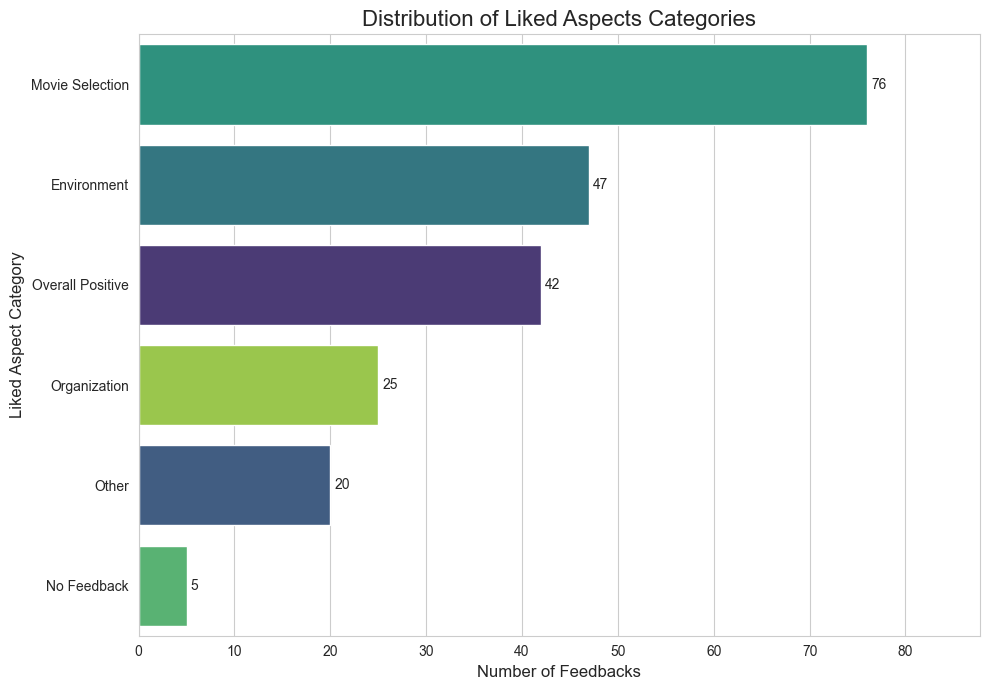

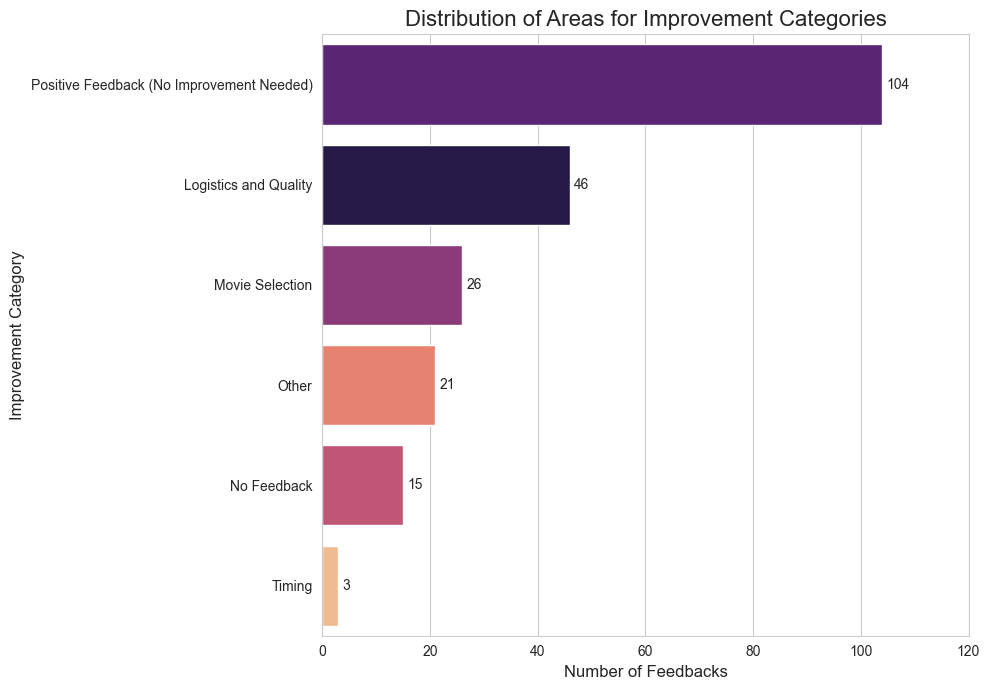

In [43]:
sns.set_style("whitegrid")

# Plot for Liked Aspects Categories
plt.figure(figsize=(10, 7))
ax_liked = sns.countplot(
    data=master_feedback_df,
    y='liked_aspects_category',
    hue='liked_aspects_category',
    order=master_feedback_df['liked_aspects_category'].value_counts().index,
    palette='viridis',
    legend=False 
)
plt.title('Distribution of Liked Aspects Categories', fontsize=16)
plt.xlabel('Number of Feedbacks', fontsize=12)
plt.ylabel('Liked Aspect Category', fontsize=12)

for container in ax_liked.containers:
    ax_liked.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.xlim(right=ax_liked.get_xlim()[1] * 1.1)
plt.tight_layout()
plt.show()


# Plot for Areas for Improvement Categories
plt.figure(figsize=(10, 7))
ax_improve = sns.countplot(
    data=master_feedback_df,
    y='areas_for_improvement_category',
    hue='areas_for_improvement_category',
    order=master_feedback_df['areas_for_improvement_category'].value_counts().index,
    palette='magma',
    legend=False 
)
plt.title('Distribution of Areas for Improvement Categories', fontsize=16)
plt.xlabel('Number of Feedbacks', fontsize=12)
plt.ylabel('Improvement Category', fontsize=12)

for container in ax_improve.containers:
    ax_improve.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.xlim(right=ax_improve.get_xlim()[1] * 1.1)
plt.tight_layout()
plt.show()

### 7. Final Data Review & Export

This step includes:
1.  **Review:** Brief inspection of `master_feedback_df`
2.  **Export:** Saving the `master_feedback_df` to a new CSV file

After completeing this step, the feedback data will be ready for visualization and deriving insight in Powe BI.

In [44]:
print("--- Performing Final Data Review ---")

print("\n1. First 5 rows of master_feedback_df:")
display(master_feedback_df.head())

print("\n2. DataFrame Info (Data Types and Non-Null Counts):")
master_feedback_df.info()

print("\n3. Descriptive Statistics for all columns:")
display(master_feedback_df.describe(include='all'))

print("\n4. Value Counts for 'satisfaction_rating':")
print(master_feedback_df['satisfaction_rating'].value_counts(dropna=False))

print("\nValue Counts for 'liked_aspects_category' (including 'No Feedback'):")
print(master_feedback_df['liked_aspects_category'].value_counts(dropna=False))

print("\nValue Counts for 'areas_for_improvement_category' (including 'No Feedback'):")
print(master_feedback_df['areas_for_improvement_category'].value_counts(dropna=False))

--- Performing Final Data Review ---

1. First 5 rows of master_feedback_df:


,feedback_date,satisfaction_rating,liked_aspects_text,areas_for_improvement_text,session_id,liked_aspects_category,areas_for_improvement_category
0,2023-10-20 21:18:11.605,5,Hərşey əla idi,Yer sayı,1,Overall Positive,Logistics and Quality
1,2023-10-20 21:18:17.436,5,Evez,Her sey bomba idi,1,Other,Positive Feedback (No Improvement Needed)
2,2023-10-20 21:18:19.383,5,Muhitin Mohtesemliyi,Mence secimli olmayan filmler olsun,1,Environment,Movie Selection
3,2023-10-20 21:18:32.931,5,Film seçimi,Daha böyük yer seçilə bilər,1,Movie Selection,Logistics and Quality
4,2023-10-20 21:18:50.588,4,"Səmimi ortam, seçilən film janrı :)",Film tam izlədilsiiiinn 😂,1,Environment,Movie Selection



2. DataFrame Info (Data Types and Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   feedback_date                   215 non-null    datetime64[ns]
 1   satisfaction_rating             215 non-null    int64         
 2   liked_aspects_text              215 non-null    object        
 3   areas_for_improvement_text      212 non-null    object        
 4   session_id                      215 non-null    int64         
 5   liked_aspects_category          215 non-null    object        
 6   areas_for_improvement_category  215 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 11.9+ KB

3. Descriptive Statistics for all columns:


,feedback_date,satisfaction_rating,liked_aspects_text,areas_for_improvement_text,session_id,liked_aspects_category,areas_for_improvement_category
count,215,215.000000,215,212,215.000000,215,215
unique,NaN,NaN,204,206,NaN,6,6
top,NaN,NaN,.,.,NaN,Movie Selection,Positive Feedback (No Improvement Needed)
freq,NaN,NaN,3,3,NaN,76,104
mean,2024-05-17 21:54:46.978372352,4.479070,NaN,NaN,6.181395,NaN,NaN
min,2023-10-20 21:18:11.605000,1.000000,NaN,NaN,1.000000,NaN,NaN
25%,2023-11-23 21:56:13.958500096,4.000000,NaN,NaN,3.000000,NaN,NaN
50%,2024-02-16 21:09:52.211000064,5.000000,NaN,NaN,6.000000,NaN,NaN
75%,2024-12-27 21:49:21.262000128,5.000000,NaN,NaN,10.000000,NaN,NaN
max,2025-05-20 22:10:09.692000,5.000000,NaN,NaN,13.000000,NaN,NaN



4. Value Counts for 'satisfaction_rating':
satisfaction_rating
5    147
4     43
3     12
2      7
1      6
Name: count, dtype: int64

Value Counts for 'liked_aspects_category' (including 'No Feedback'):
liked_aspects_category
Movie Selection     76
Environment         47
Overall Positive    42
Organization        25
Other               20
No Feedback          5
Name: count, dtype: int64

Value Counts for 'areas_for_improvement_category' (including 'No Feedback'):
areas_for_improvement_category
Positive Feedback (No Improvement Needed)    104
Logistics and Quality                         46
Movie Selection                               26
Other                                         21
No Feedback                                   15
Timing                                         3
Name: count, dtype: int64


In [45]:
# Drop columns
columns_to_drop = ['liked_aspects_text', 'areas_for_improvement_text']
master_feedback_df = master_feedback_df.drop(columns=columns_to_drop)

In [46]:
# Reorder columns
column_order = [
    'session_id',
    'feedback_date',
    'satisfaction_rating',
    'liked_aspects_category',
    'areas_for_improvement_category', 
]

master_feedback_df = master_feedback_df.reindex(columns=column_order)

In [47]:
# Exporting Processed Data for Power BI
output_file_name = 'processed_feedback_data.csv'

try:
    master_feedback_df.to_csv(output_file_name, index=False, encoding='utf-8-sig')
    print(f"\nSuccessfully exported data to '{output_file_name}'")
except Exception as e:
    print(f"\nERROR: Failed to export data to CSV. Reason: {e}")

print("Data Preparation Completed.")


Successfully exported data to 'processed_feedback_data.csv'
Data Preparation Completed.
